# Plag-Liq and Kspar-Liq Matching
- This notebook shows how to assess all possible matches for Plag-Liq and Kspar-Liq pairs where there aren't obvious pairwise analyses
- You can download the excel spreadsheet here: https://github.com/PennyWieser/Thermobar/blob/main/docs/Examples/Feldspar_Thermobarometry/Feldspar_Liquid.xlsx

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import Thermobar as pt
pd.options.display.max_columns = None

## Example 1 - Plag and Liquid. 

In [2]:
## Load in the liquids
out_Liq=pt.import_excel('Feldspar_Liquid.xlsx', sheet_name="Liq_only")
Liqs=out_Liq['Liqs']
# Load in the Plags
out_Plag=pt.import_excel('Feldspar_Liquid.xlsx', sheet_name="Plag_only")
Plags=out_Plag['Plags']

In [3]:
## Inspect them to check they read in right
display(Plags.head())
display(Liqs.head())

,SiO2_Plag,TiO2_Plag,Al2O3_Plag,FeOt_Plag,MnO_Plag,MgO_Plag,CaO_Plag,Na2O_Plag,K2O_Plag,Cr2O3_Plag,Sample_ID_Plag
0,57.3,0.09,26.6,0.43,0.0,0.03,8.33,6.11,0.49,0.0,Plag1
1,56.5,0.12,26.9,0.47,0.0,0.05,8.95,5.66,0.47,0.0,Plag2
2,57.6,0.11,26.3,0.50,0.0,0.07,8.50,6.27,0.40,0.0,Plag3_core
3,57.2,0.16,27.0,0.62,0.0,0.06,9.03,5.58,0.84,0.0,Plag4
4,56.7,0.14,27.6,0.69,0.0,0.11,9.46,5.58,0.48,0.0,Plag5


,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,Cr2O3_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,NiO_Liq,CoO_Liq,CO2_Liq,Sample_ID_Liq
0,49.1,3.22,14.4,14.8,0.14,3.20,6.72,3.34,1.70,0.0,1.13,0.0,0.0,0.0,0.0,0.0,Glass1
1,49.2,3.89,15.3,13.7,0.12,3.88,6.76,3.44,1.22,0.0,0.83,0.0,0.0,0.0,0.0,0.0,Glass2
2,49.6,3.79,15.8,13.0,0.14,4.26,6.59,3.65,1.04,0.0,0.63,0.0,0.0,0.0,0.0,0.0,Glass3
3,47.1,4.21,12.0,17.8,0.18,3.40,7.28,2.93,2.02,0.0,2.32,0.0,0.0,0.0,0.0,0.0,Glass4
4,48.1,3.88,13.2,16.4,0.16,4.02,6.51,3.36,1.36,0.0,1.59,0.0,0.0,0.0,0.0,0.0,Glass5


## Please check your feldspars are actually plagioclases! If you apply plag-liq thermometers to kspars, you get stupid results, that mess up the iterative calculations

## Lets plot to inspect and check they are actually plag, else you will have convergence issues
-This function relies heavily on the ternary plot package from Marc Harper et al. 2015 - https://github.com/marcharper/python-ternary, if you use these figures, you must cite that (Marc Harper et al. (2015). python-ternary: Ternary Plots in Python. Zenodo. 10.5281/zenodo.594435) as well as Thermobar.

You may have problems with this package if you have the separate “ternary” package installed (yes, there are python packages called ternary and python-ternary- Yay!). I (penny) got the error “module ternary has no attribute figure, so had to uninstall the ternary I had through pip (pip uninstall ternary), and re-install python-ternary through conda in the command line “conda install python-ternary”. If you have everything in pip, or conda, keep in 1 environment, don’t follow my bad example here!

<AxesSubplot:>

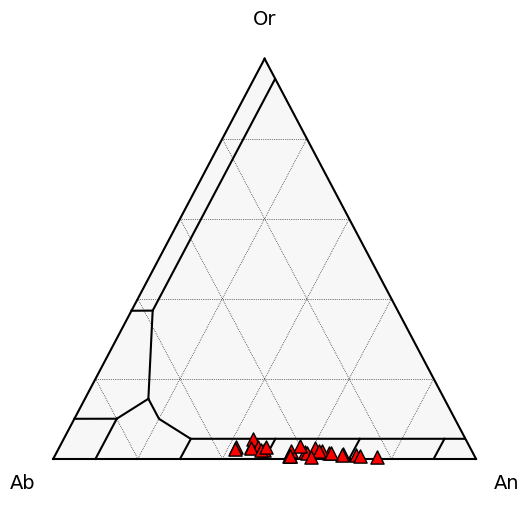

In [4]:
Plag_tern_points = pt.tern_points_fspar(fspar_comps=Plags)

fig, tax = pt.plot_fspar_classification(major_grid=True, ticks=False)

# Here we plot the data ontop, with plag as red triangles
tax.scatter(
    Plag_tern_points,
    edgecolor="k",
    marker="^",
    facecolor="red",
    label='Plag',
   s=90
)

In [5]:
Plag_components=pt.calculate_cat_fractions_plagioclase(plag_comps=Plags)
RealPlags=Plags.loc[Plag_components['An_Plag']>0.05].reset_index(drop=True)

## Example 1a - All possible Liq-Plag matches, An-Ab equilibrium
- You can specify to use the An-Ab equilibrium test of Putirka (2008) as in this example

In [6]:
MM_dict=pt.calculate_fspar_liq_temp_matching(liq_comps=Liqs, plag_comps=RealPlags, 
                                             equationT="T_Put2008_eq24a", P=5, 
                                                Ab_An_P2008=True, H2O_Liq=2)
Av_Matches=MM_dict['Av_PTs']
All_Matches=MM_dict['All_PTs']

Considering N=28 Fspar & N=24 Liqs, which is a total of N=672 Liq-Fspar pairs, be patient if this is >>1 million!
Applying filter to only average those that pass the An-Ab eq test of Putirka, 2008
Done!!! I found a total of N=327 Fspar-Liq matches using the specified filter. N=28 Fspar out of the N=28 Fspar that you input matched to 1 or more liquids


## Example 1b - All possible Liq-Plag matches, no filter
- This could be used if you want to develop your own equilibrium filters

In [7]:
MM_dict=pt.calculate_fspar_liq_temp_matching(liq_comps=Liqs, plag_comps=RealPlags, 
                                             equationT="T_Put2008_eq24a", P=5, 
                                                Ab_An_P2008=False, H2O_Liq=2)
Av_Matches=MM_dict['Av_PTs']
All_Matches=MM_dict['All_PTs']

Considering N=28 Fspar & N=24 Liqs, which is a total of N=672 Liq-Fspar pairs, be patient if this is >>1 million!
We are returning all pairs, if you want to use the Ab-An equilibrium test of Putirka (2008), enter Ab_An_P2008=True
Done!!! I found a total of N=672 Fspar-Liq matches using the specified filter. N=28 Fspar out of the N=28 Fspar that you input matched to 1 or more liquids


## Example 1c - Iterating T and H2O for all possible Plag-Liq matches

In [8]:
T_H_Iter_dict=pt.calculate_fspar_liq_temp_hygr_matching(liq_comps=Liqs, plag_comps=RealPlags,
        equationT="T_Put2008_eq24a", equationH="H_Waters2015", P=5)
T_H_Calc_Av=T_H_Iter_dict.get('Av_HTs')
T_H_Calc_All=T_H_Iter_dict.get('All_HTs')
T_H_Evol=T_H_Iter_dict.get('T_H_Evolution')

Considering N=28 Fspar & N=24 Liqs, which is a total of N=672 Liq- Fspar pairs, be patient if this is >>1 million!


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:02<00:00,  9.58it/s]


Applying filter to only average those that pass the An-Ab eq test of Putirka, 2008
Done!!! I found a total of N=327 Fspar-Liq matches using the specified filter. N=28 Fspar out of the N=28 Fspar that you input matched to 1 or more liquids


Text(0.5, 0, 'H$_2$O Calc (wt%)')

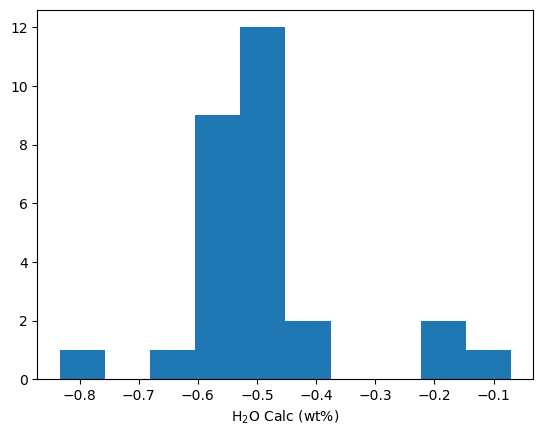

In [9]:
# Maybe you want to plot a histogram of H2O contents
plt.hist(T_H_Calc_Av['Mean_H2O_calc'])
plt.xlabel('H$_2$O Calc (wt%)')

## Example 2 - Kspar-Liquid calculations

In [10]:
# Load in the Kspars
out_Kspar=pt.import_excel('Feldspar_Liquid.xlsx', sheet_name="Kspar_only")
Kspars=out_Kspar['Kspars']

# Load in the liquids you want to match with
out_Liq2=pt.import_excel('Feldspar_Liquid.xlsx', sheet_name="Evolved_Liq_only")
Liqs=out_Liq2['Liqs']

### Check actually kspar

<AxesSubplot:>

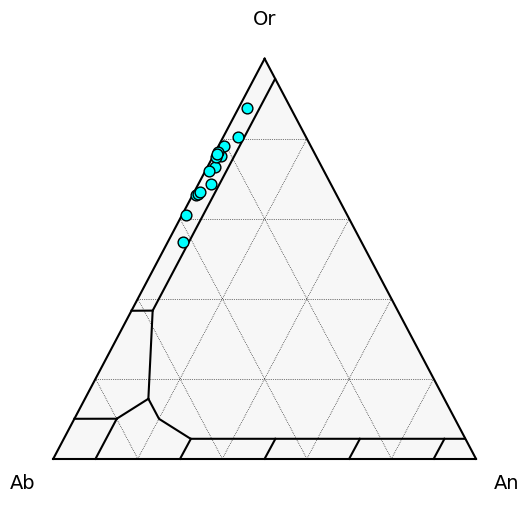

In [11]:
Kspar_tern_points = pt.tern_points_fspar(fspar_comps=Kspars)
fig, tax = pt.plot_fspar_classification(major_grid=True, ticks=False)

tax.scatter(
    Kspar_tern_points,
    edgecolor="k",
    marker="o",
    facecolor="cyan",
   s=60, label='Kspar'
)

In [12]:
Kspar_components=pt.calculate_cat_fractions_kspar(kspar_comps=Kspars)
RealKspars=Kspars.loc[Kspar_components['An_Kspar']<0.05].reset_index(drop=True)

### 2a - Lets calculate temperature for all liq-kspar matches
- Currently no equilibrium tests exist for Kspar-Liquid that we are aware off. If you know of ones I can implement, please reach out!

In [15]:
melt_match_2=pt.calculate_fspar_liq_temp_matching(liq_comps=Liqs, kspar_comps=RealKspars, 
                                             equationT="T_Put2008_eq24b", P=5, 
                                                Ab_An_P2008=True, H2O_Liq=2)
melt_match_2['Av_PTs'].head()

Considering N=15 Fspar & N=15 Liqs, which is a total of N=225 Liq-Fspar pairs, be patient if this is >>1 million!
Sorry, no equilibrium tests implemented for Kspar-Liquid. Weve returned all possible pairs, you will have to filter them yourselves
Done!!! I found a total of N=225 Fspar-Liq matches using the specified filter. N=15 Fspar out of the N=15 Fspar that you input matched to 1 or more liquids


,ID_Fspar,Mean_Sample_ID_Kspar,Mean_T_K_calc,Mean_SiO2_Liq,Mean_TiO2_Liq,Mean_Al2O3_Liq,Mean_FeOt_Liq,Mean_MnO_Liq,Mean_MgO_Liq,Mean_CaO_Liq,Mean_Na2O_Liq,Mean_K2O_Liq,Mean_Cr2O3_Liq,Mean_P2O5_Liq,Mean_H2O_Liq,Mean_Fe3Fet_Liq,Mean_NiO_Liq,Mean_CoO_Liq,Mean_CO2_Liq,Mean_Sample_ID_Liq,Mean_SiO2_Liq_mol_frac,Mean_MgO_Liq_mol_frac,Mean_MnO_Liq_mol_frac,Mean_FeOt_Liq_mol_frac,Mean_CaO_Liq_mol_frac,Mean_Al2O3_Liq_mol_frac,Mean_Na2O_Liq_mol_frac,Mean_K2O_Liq_mol_frac,Mean_TiO2_Liq_mol_frac,Mean_P2O5_Liq_mol_frac,Mean_Cr2O3_Liq_mol_frac,Mean_Si_Liq_cat_frac,Mean_Mg_Liq_cat_frac,Mean_Mn_Liq_cat_frac,Mean_Fet_Liq_cat_frac,Mean_Ca_Liq_cat_frac,Mean_Al_Liq_cat_frac,Mean_Na_Liq_cat_frac,Mean_K_Liq_cat_frac,Mean_Ti_Liq_cat_frac,Mean_P_Liq_cat_frac,Mean_Cr_Liq_cat_frac,Mean_Mg_Number_Liq_NoFe3,Mean_Mg_Number_Liq_Fe3,Mean_ID_liq,Mean_Sample_ID_liq,# of Liqs Averaged,Std_Sample_ID_Kspar,Std_T_K_calc,Std_SiO2_Liq,Std_TiO2_Liq,Std_Al2O3_Liq,Std_FeOt_Liq,Std_MnO_Liq,Std_MgO_Liq,Std_CaO_Liq,Std_Na2O_Liq,Std_K2O_Liq,Std_Cr2O3_Liq,Std_P2O5_Liq,Std_H2O_Liq,Std_Fe3Fet_Liq,Std_NiO_Liq,Std_CoO_Liq,Std_CO2_Liq,Std_Sample_ID_Liq,Std_SiO2_Liq_mol_frac,Std_MgO_Liq_mol_frac,Std_MnO_Liq_mol_frac,Std_FeOt_Liq_mol_frac,Std_CaO_Liq_mol_frac,Std_Al2O3_Liq_mol_frac,Std_Na2O_Liq_mol_frac,Std_K2O_Liq_mol_frac,Std_TiO2_Liq_mol_frac,Std_P2O5_Liq_mol_frac,Std_Cr2O3_Liq_mol_frac,Std_Si_Liq_cat_frac,Std_Mg_Liq_cat_frac,Std_Mn_Liq_cat_frac,Std_Fet_Liq_cat_frac,Std_Ca_Liq_cat_frac,Std_Al_Liq_cat_frac,Std_Na_Liq_cat_frac,Std_K_Liq_cat_frac,Std_Ti_Liq_cat_frac,Std_P_Liq_cat_frac,Std_Cr_Liq_cat_frac,Std_Mg_Number_Liq_NoFe3,Std_Mg_Number_Liq_Fe3,Std_ID_liq,Std_Sample_ID_liq,Sample_ID_Kspar
0,0,Kspar1,1138.165453,62.976667,0.45,18.56,3.17,0.27,0.23,1.64,5.71,6.223333,0.0,0.02,2.0,0.0,0.0,0.0,0.0,7.0,0.709623,0.003864,0.002577,0.029872,0.0198,0.123242,0.062378,0.044734,0.003814,0.000095,0.0,0.576767,0.00314,0.002094,0.024278,0.016092,0.200325,0.101348,0.072699,0.0031,0.000155,0.0,0.114521,0.114521,7.0,7.0,15,Kspar1,27.575211,0.703732,0.0,0.0,0.0,0.0,0.0,0.0,0.507093,0.351866,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.472136,0.007112,0.000006,0.000004,0.000045,0.00003,0.000186,0.005578,0.002604,0.000006,1.436252e-07,0.0,0.009076,0.000015,0.00001,0.000115,0.000076,0.000947,0.008549,0.003937,0.000015,7.329643e-07,0.0,0.0,0.0,4.472136,4.472136,Kspar1
1,1,Kspar2,1087.464362,62.976667,0.45,18.56,3.17,0.27,0.23,1.64,5.71,6.223333,0.0,0.02,2.0,0.0,0.0,0.0,0.0,7.0,0.709623,0.003864,0.002577,0.029872,0.0198,0.123242,0.062378,0.044734,0.003814,0.000095,0.0,0.576767,0.00314,0.002094,0.024278,0.016092,0.200325,0.101348,0.072699,0.0031,0.000155,0.0,0.114521,0.114521,7.0,7.0,15,Kspar2,25.122349,0.703732,0.0,0.0,0.0,0.0,0.0,0.0,0.507093,0.351866,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.472136,0.007112,0.000006,0.000004,0.000045,0.00003,0.000186,0.005578,0.002604,0.000006,1.436252e-07,0.0,0.009076,0.000015,0.00001,0.000115,0.000076,0.000947,0.008549,0.003937,0.000015,7.329643e-07,0.0,0.0,0.0,4.472136,4.472136,Kspar2
2,2,Kspar3,977.039695,62.976667,0.45,18.56,3.17,0.27,0.23,1.64,5.71,6.223333,0.0,0.02,2.0,0.0,0.0,0.0,0.0,7.0,0.709623,0.003864,0.002577,0.029872,0.0198,0.123242,0.062378,0.044734,0.003814,0.000095,0.0,0.576767,0.00314,0.002094,0.024278,0.016092,0.200325,0.101348,0.072699,0.0031,0.000155,0.0,0.114521,0.114521,7.0,7.0,15,Kspar3,20.190486,0.703732,0.0,0.0,0.0,0.0,0.0,0.0,0.507093,0.351866,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.472136,0.007112,0.000006,0.000004,0.000045,0.00003,0.000186,0.005578,0.002604,0.000006,1.436252e-07,0.0,0.009076,0.000015,0.00001,0.000115,0.000076,0.000947,0.008549,0.003937,0.000015,7.329643e-07,0.0,0.0,0.0,4.472136,4.472136,Kspar3
3,3,Kspar4,1023.046234,62.976667,0.45,18.56,3.17,0.27,0.23,1.64,5.71,6.223333,0.0,0.02,2.0,0.0,0.0,0.0,0.0,7.0,0.709623,0.003864,0.002577,0.029872,0.0198,0.123242,0.062378,0.044734,0.003814,0.000095,0.0,0.576767,0.00314,0.002094,0.024278,0.016092,0.200325,0.101348,0.072699,0.0031,0.000155,0.0,0.114521,0.114521,7.0,7.0,15,Kspar4,22.177217,0.703732,0.0,0.0,0.0,0.0,0.0